In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./data/data.xlsx')
print(df.head())

   voltage   current
0    -1.25 -3.164730
1    -1.20 -2.346773
2    -1.15 -1.305936
3    -1.10 -1.891162
4    -1.05 -1.040983


### What curve is this? 

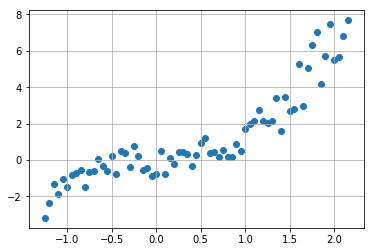

In [3]:
plt.scatter(df['voltage'], df['current'])
plt.grid()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df['voltage'], df["current"], test_size=0.25, random_state=2)
quad_predictor = PolynomialFeatures(degree=10)
quad_predictor

PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)

In [48]:
# generate all possible combinations of quadratic equations with fit_transform
X_train_quadratic = quad_predictor.fit_transform(X_train.values.reshape(-1, 1))
X_test_quadratic = quad_predictor.transform(X_test.values.reshape(-1, 1))

In [49]:
regressor_quadratic = LinearRegression()
regressor_quadratic

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
obtained_model = regressor_quadratic.fit(X_train_quadratic, y_train)
obtained_model
# regressor_quadratic is obtained_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
X_test_quadratic = quad_predictor.transform(X_test.values.reshape(-1, 1))
obtained_y_test = obtained_model.predict(X_test_quadratic)

In [52]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true = y_test, y_pred = obtained_y_test)
print("MSE = %f" % mse)

MSE = 1.280791


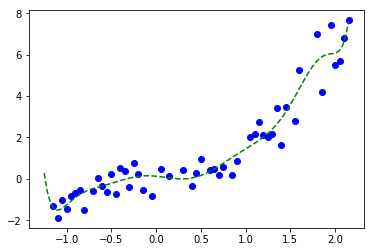

In [58]:
# plt.plot(X_test, obtained_y_test, marker='o', linestyle='None', color='r')
plt.plot(X_train, y_train, marker='o', linestyle='None', color='b')

xx = np.linspace(df['voltage'].min(), df['voltage'].max(), 100)
xx_quadratic = quad_predictor.fit_transform(xx.reshape(-1, 1))

plt.plot(xx, obtained_model.predict(xx_quadratic), linestyle='--', color='g')

## Can you find the metrics?

## Score, cross validation and r-squared score?